In [116]:
import pandas as pd
from prophet import Prophet
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = 11,9



import numpy as np

In [117]:
nifty_200  = pd.read_csv('NIFTY_200.csv', header=0)
nifty_200.rename(columns={'Turnover (₹ Cr)':'Turnover','Date ':'Date'}, inplace=True)

In [118]:
nifty_200['Date'] = pd.to_datetime(nifty_200['Date'])

/tmp/ipykernel_27180/731835211.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  nifty_200['Date'] = pd.to_datetime(nifty_200['Date'])


In [119]:
prophet_df = pd.DataFrame(columns=['ds','y'])
prophet_df[['ds','y']] = nifty_200[['Date','Turnover']]

In [120]:
prophet_df.dropna(inplace=True)
prophet_df.head()

,ds,y
0,2022-12-07,33464.51
1,2022-12-08,34730.50
2,2022-12-09,43249.51
3,2022-12-12,33416.75
4,2022-12-13,35750.99


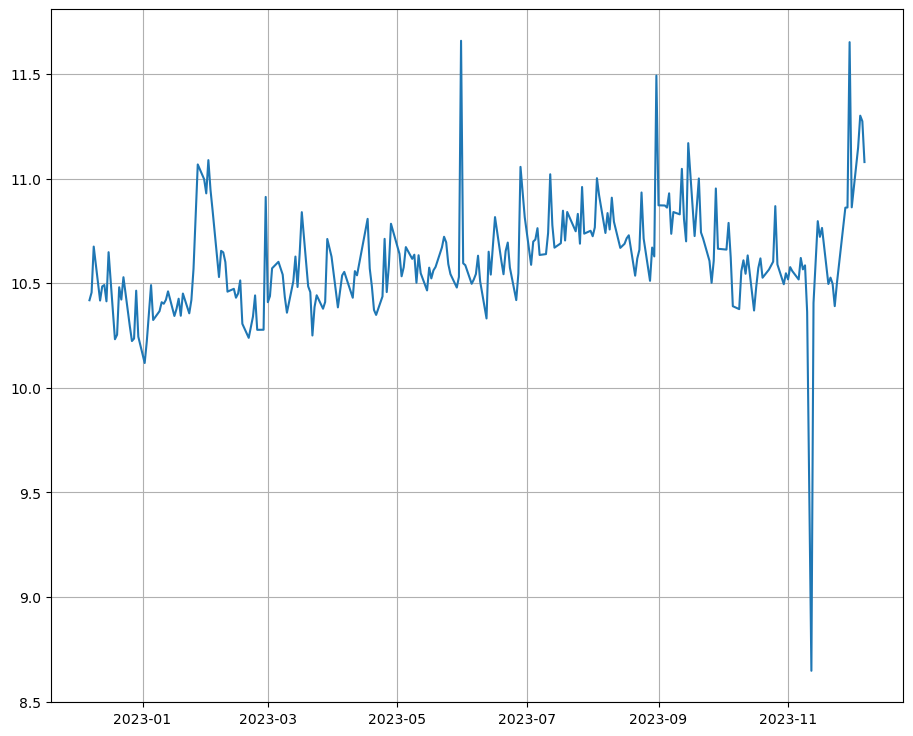

In [121]:
plt.plot(prophet_df['ds'],np.log(prophet_df['y']))
plt.grid('on')

In [126]:
np.argmin(prophet_df['y'])


229

In [129]:
np.min(prophet_df['y'])

5692.89

In [130]:
prophet_df = prophet_df[prophet_df['y']>np.min(prophet_df['y'])]

In [131]:
# There is a massive low turnover on one of the days in first/second week of november
# Mainly because that day was diwali and it was a Muhurat trading window opened for half an hour

In [132]:
# Create a prophet instance

m = Prophet(
    interval_width=0.95,
    growth='linear',
)

In [133]:
m.fit(prophet_df)

00:16:15 - cmdstanpy - INFO - Chain [1] start processing
00:16:15 - cmdstanpy - INFO - Chain [1] done processing


In [137]:
# make future dates upto 1 year

future = m.make_future_dataframe(periods=90)
future.tail()

,ds
331,2024-03-02
332,2024-03-03
333,2024-03-04
334,2024-03-05
335,2024-03-06


In [138]:
forecast = m.predict(future)
forecast[['ds','yhat','yhat_lower','yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
331,2024-03-02,52834.093354,32221.184528,73800.140710
332,2024-03-03,52875.740399,30094.250574,73872.759553
333,2024-03-04,49751.867623,28594.757366,70008.226223
334,2024-03-05,53224.823148,32395.409174,72478.345836
335,2024-03-06,54895.196651,33855.777208,75309.040064


/home/susearc/Macos/py3.11/lib/python3.11/site-packages/prophet/plot.py:72: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
/home/susearc/Macos/py3.11/lib/python3.11/site-packages/prophet/plot.py:73: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  ax.plot(m.history['ds'].dt.to_pydatetime(), m.history['y'], 'k.',


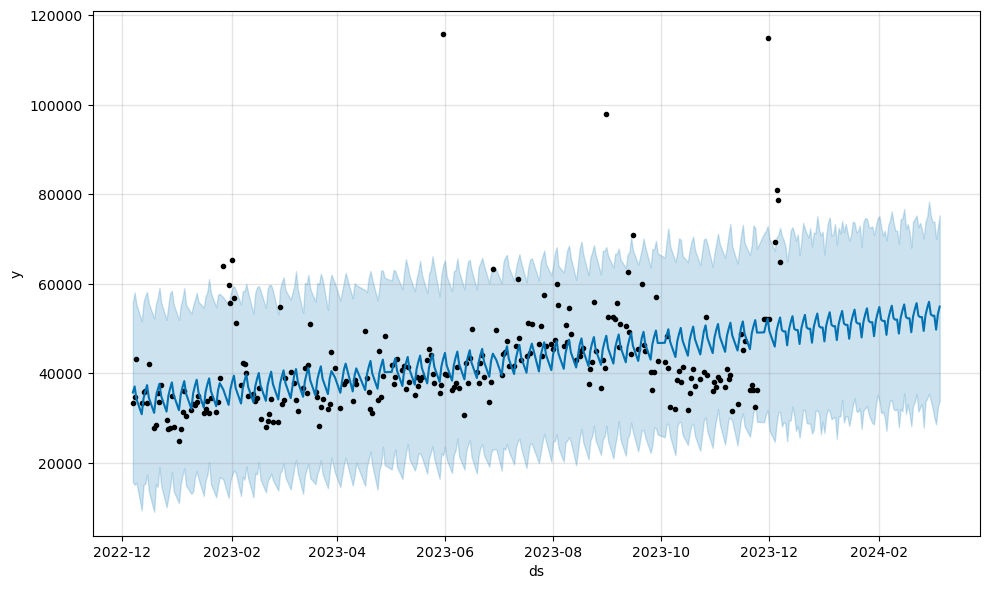

In [139]:
fig1 = m.plot(forecast)